## Sierra Nevada Precipitation

[Lake Tahoe](https://www.fs.usda.gov/main/ltbmu/about-forest/about-area) was selected to examine trends in California precipitation. The location is nested within the Sierra Nevada mountain range, which functions as a collection of moisture islands. The range forms barriers to incoming weather systems so that air and moisture are lifted over them, condensing the moisture which falls as precipitation to build thick snowpacks. Given the high precipitation and low evapotranspiration, the [Sierra](https://www.fs.usda.gov/psw/publications/documents/psw_gtr272/psw_gtr272_013.pdf) produces most of the runoff forming my state's water supply. 

#### Site: SOUTH LAKE TAHOE 1.4 ESE, CA US

<img src="south_lake_tahoe_station.png" alt="South Lake Tahoe Station" width="350px" height="420px">

##### Data Description

The South Lake Tahoe [subset](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1CAED0035/detail) of the [Global Historical Climatology Network daily dataset](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html) contains observations obtained at a weather station positioned at 1,919.6 m elevation. The station observes rain and melted snow (in); snow, ice pellets, and hail (in); and snow, ice pellets, and hail on ground (in). 

##### Data Citation

Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. [GHCND:US1CAED0035]. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ [09/15/2024].

##### Methods

The data was accessed from a National Centers for Environmental Information [API service](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation) and queried for the precipitation data type, station, and date range of 01-01-2022 to 12-31-2023. This range was chosen to gather full water years for comparison; the station began observing precipitation in late 2021. The CSV was ingested using the [pandas](https://pandas.pydata.org/) library and the date records converted to a pandas datetime object. Using these datetimes, month and year data were generated. Next the data was subset to precipitation, month, and year, and grouped by the month and year average observed precipitation value. Some months contained sparse daily records and the averages identified reflect this limitation. Finally, visualization libraries [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/) were used to plot and display the relationship between month and precipitation across annual groupings.  

#### Analysis

In [1]:
import warnings
# ignore FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SLT_DAILY_URL = ("https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries"+
                 "&dataTypes=PRCP&stations=US1CAED0035&startDate=2022-01-01&endDate=2023-12-31")

SLT_DAILY_URL

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=US1CAED0035&startDate=2022-01-01&endDate=2023-12-31'

In [3]:
# import data from NCEI API
slt_daily_summaries = pd.read_csv(SLT_DAILY_URL)

In [4]:
# PRCP = precipitation (inches)

slt_daily_summaries.head()

,STATION,DATE,PRCP
0,US1CAED0035,2022-01-04,0.0
1,US1CAED0035,2022-01-07,10.0
2,US1CAED0035,2022-02-15,46.0
3,US1CAED0035,2022-02-21,0.0
4,US1CAED0035,2022-02-23,NaN


In [5]:
# get the pandas datetime from DATE col 
slt_daily_summaries['DATE'] = pd.to_datetime(slt_daily_summaries['DATE'])
print(slt_daily_summaries.dtypes)

STATION            object
DATE       datetime64[ns]
PRCP              float64
dtype: object


In [6]:
# get month
slt_daily_summaries['MONTH'] = slt_daily_summaries['DATE'].dt.month
slt_daily_summaries['MONTH'].astype('int')

# get year 
slt_daily_summaries['YEAR'] = slt_daily_summaries['DATE'].dt.year
slt_daily_summaries['YEAR'].astype('int')

slt_daily_summaries.head()

,STATION,DATE,PRCP,MONTH,YEAR
0,US1CAED0035,2022-01-04,0.0,1,2022
1,US1CAED0035,2022-01-07,10.0,1,2022
2,US1CAED0035,2022-02-15,46.0,2,2022
3,US1CAED0035,2022-02-21,0.0,2,2022
4,US1CAED0035,2022-02-23,NaN,2,2022


In [7]:
# drop all rows where PRCP is not a number
slt_daily_summaries.dropna(inplace=True)

slt_daily_summaries.head()

,STATION,DATE,PRCP,MONTH,YEAR
0,US1CAED0035,2022-01-04,0.0,1,2022
1,US1CAED0035,2022-01-07,10.0,1,2022
2,US1CAED0035,2022-02-15,46.0,2,2022
3,US1CAED0035,2022-02-21,0.0,2,2022
5,US1CAED0035,2022-03-04,48.0,3,2022


In [8]:
# subset the columns wanted 
slt_daily_summaries = slt_daily_summaries.loc[:, ['PRCP', 'MONTH', 'YEAR']]

slt_daily_summaries.head()

,PRCP,MONTH,YEAR
0,0.0,1,2022
1,10.0,1,2022
2,46.0,2,2022
3,0.0,2,2022
5,48.0,3,2022


In [9]:
# group months by their average observed precipitation value 
slt_month_precip_avg = slt_daily_summaries.groupby(by=["MONTH", "YEAR"]).mean() 

slt_month_precip_avg

PRCP
MONTH YEAR            
1     2022    5.000000
      2023  119.625000
2     2022   23.000000
      2023  107.777778
3     2022   26.600000
      2023  153.928571
4     2022  100.000000
      2023   15.333333
5     2023   34.125000
6     2022   14.333333
8     2022   32.333333
      2023   21.666667
9     2022    7.000000
      2023   73.666667
10    2022    0.000000
      2023  142.000000
11    2022  134.500000
12    2022   37.333333
      2023  104.750000

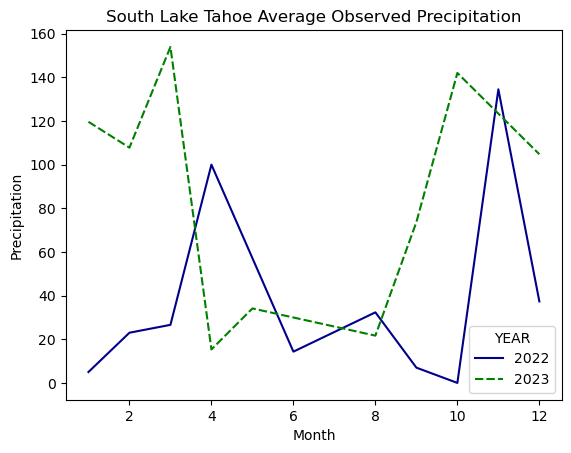

In [10]:
# create annual plot

sns.lineplot(data=slt_month_precip_avg, x="MONTH", y="PRCP", hue="YEAR", style="YEAR", palette=['darkblue', 'g'])

plt.title('South Lake Tahoe Average Observed Precipitation')
plt.xlabel("Month")
plt.ylabel("Precipitation")


plt.savefig("slt-obs-precip-2022-2023.png") 
plt.show()

#### High Year-to-Year Precipitation Variability

The Sierra Nevada mountains receive most of their precipitation during a short wet period consisting of fix to six [atmospheric river storms](https://www.noaa.gov/stories/what-are-atmospheric-rivers) on average with great annual variability. A difference of one to two major storms can ensure a normal versus a dry water year. The above graph highlights the annual variance in precipitation with notable shifts in the early months when it is optimal for precipitation to fall as snow rather than rain, supporting longer streamflows later in the summer when demand is high. The majority of precipitation is expected between December through March, but [warmer temperatures](https://www.fs.usda.gov/psw/publications/documents/psw_gtr272/psw_gtr272_013.pdf) influence whether or not precipitation falls as snow. 

Atmospheric rivers are often associated with [flood risk](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2020GL088679) and are especially risky depending on when they occur. For instance, one of these events occurred in March 2023 (see graph) and in preparation for the event, the [City of South Lake Tahoe](https://sierranevadaalliance.org/city-of-south-lake-tahoe-urges-residents-to-prepare-for-impacts-of-rain-on-snow-event/) communicated the danger to local residents: "The potential of heavy rainfall across the region brings the threat of flooding and roof collapses. Flooding may occur as a result of rain on existing snow and ice on the ground, and streams and river basins that are already elevated after numerous storms." Atmospheric rivers are a natural component of Sierra hydrology and [provide about 60% of the state's developed water](https://sierranevada.ca.gov/what-we-do/#regionalChallenges), but they are expected to become more extreme under climate change with [projected precipitation](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019JD031554) increasing 25% on average. How the state and stewards of the Sierra Nevada respond to shifts in precipitation will largely shape California's future resiliency. 